# Titanic : Machine learning from disaster 

## Predicting survival of passengers on Titanic 


- Defining problem statement   
- Collecting Data
- EDA  
- Visualization 
- Feature Engineering
- Feature Selection 
- Modelling 
- Testing


## 1. Defining problem statement 

In this challenge, we build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (i.e name, age, gender, socio-economic class, etc).

In [22]:
from IPython.display import Image
Image(url= "https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg")

## 2. Collecting Data

Get data from Kaggle competition page.
Loading the data with pandas..


In [95]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 3. Exploratory data analysis

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


177 Age entries, 687 Cabin entries are missing.
So some Age data and a lot of Cabin data is missing in both sets. Conversely you can use 'train.isnull().sum()'

The total data from both sets adds upto 1309 but the official count is 1317. So 8 records are missing. 

## 4. Visualization 

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
sns.set() # sets seaborn as default, good for dark mode. 
plt.rcParams['figure.figsize'] = (15,5)

### 0.Survivability

Survived = 342 ,Dead = 549


Text(0.5, 1.0, 'Survived %')

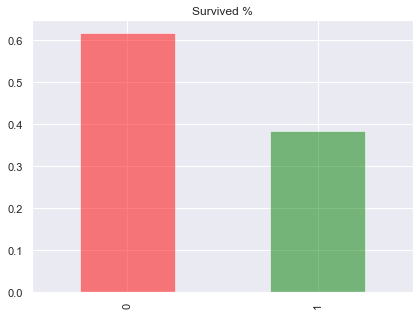

In [28]:
print('Survived =',train[train['Survived']==1]['Survived'].count(),',Dead =',train[train['Survived']==0]['Survived'].count())
# print( train[['Survived']].sum() ) 

plt.subplot(1,2,1)
train.Survived.value_counts(normalize = True).plot(kind='bar', alpha = 0.5, color=['red','green'])
plt.title("Survived %")

Inference : We find that around 62% people died and 38% survived. 

### 1.Age

Text(0.5, 1.0, 'Age vs Survival')

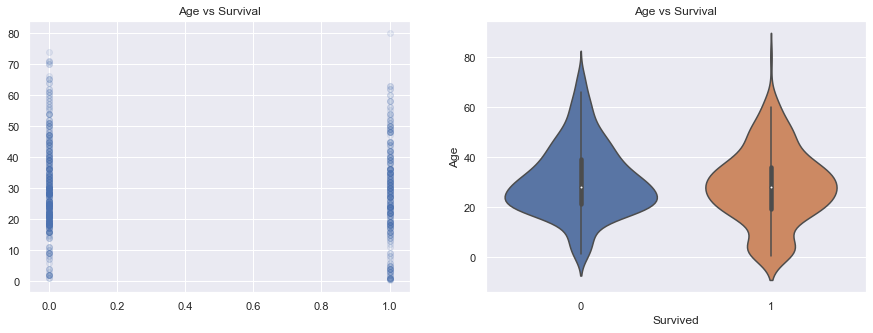

In [29]:
plt.subplot(1,2,1)
plt.scatter(train.Survived, train.Age, alpha = 0.1)
plt.title("Age vs Survival")

plt.subplot(1,2,2)
sns.violinplot(x=train.Survived, y=train.Age, data=train)
plt.title("Age vs Survival")

Inference : Children were more likely to survive, 20-30 yrs were majority age group.

### Filling missing age data and categorizing 

In [96]:
for dataset in full_data:
    age_avg   = dataset['Age'].mean()
    age_std   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

C:\Users\farooq_fox\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


     CategoricalAge  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.369942
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


### 2.Class

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Text(2.1, 150, '24.2%')

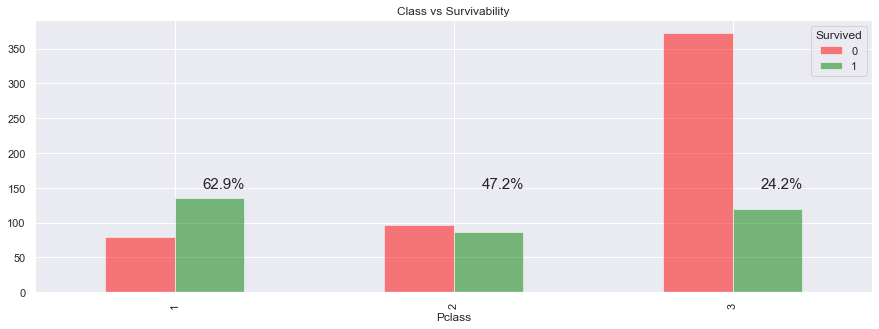

In [76]:
df = (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print(df)

train.groupby('Survived').Pclass.value_counts().unstack(0).plot.bar(alpha=0.5, color=['red','green'])
plt.title("Class vs Survivability")
plt.text(0.1, 150, '62.9%', fontsize=15)
plt.text(1.1, 150, '47.2%', fontsize=15)
plt.text(2.1, 150, '24.2%', fontsize=15)

Survivability was least in 3rd class as they were not allowed on deck until 1st and 2nd were loaded into life boats. 
Survivors of 3rd class were more as 2nd class was inherently small on ship. 

### 3.Class vs Age

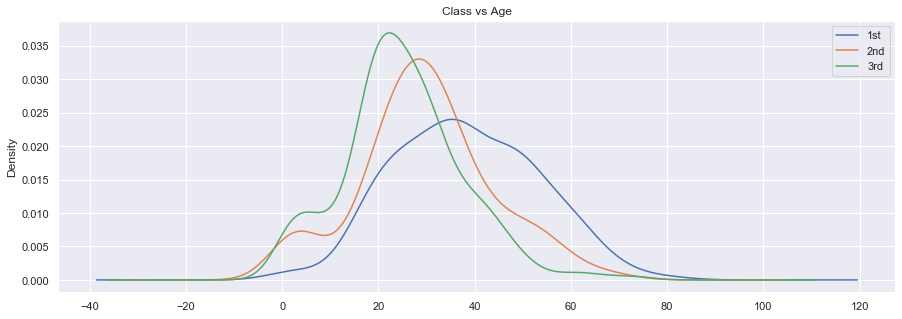

In [31]:
for x in [1,2,3]:
    train.Age[train.Pclass == x].plot(kind="kde")
plt.title('Class vs Age')
plt.legend(('1st','2nd','3rd'))

Younger people were mostly class 3, middle aged class 2 and older ones class 1 

In [32]:
print( train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).count() )

  Embarked  Survived
0        C       168
1        Q        77
2        S       644


### 4. Embarked and filling missing data

In [33]:
# 2 entries have blank Embarked data, we can either discared these or fill them with Southampton.
# Lets fill the blanks, 

full_data = [train, test]

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).count())

  Embarked  Survived
0        C       168
1        Q        77
2        S       646


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


Text(0.5, 1.0, 'Boarding location vs Survivability')

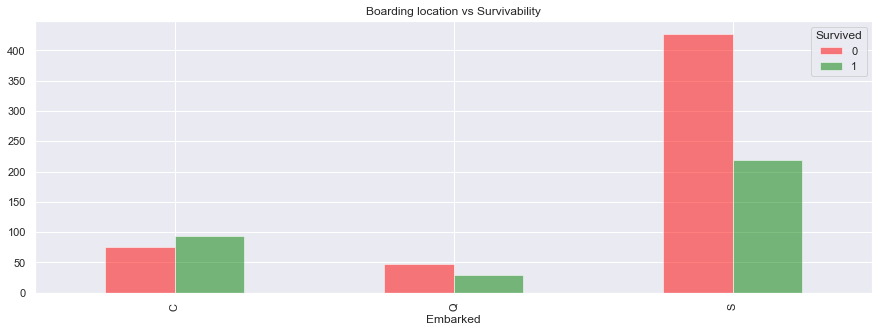

In [79]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

train.groupby('Survived').Embarked.value_counts().unstack(0).plot.bar(alpha=0.5, color=['red','green'])
plt.title('Boarding location vs Survivability')

Over 70% boarded the ship at Southampton (England), about 20% at Cherbourg (France) under 10% at Queensland (Ireland) 

### 5.Gender

Text(0.5, 1.0, 'Children survived')

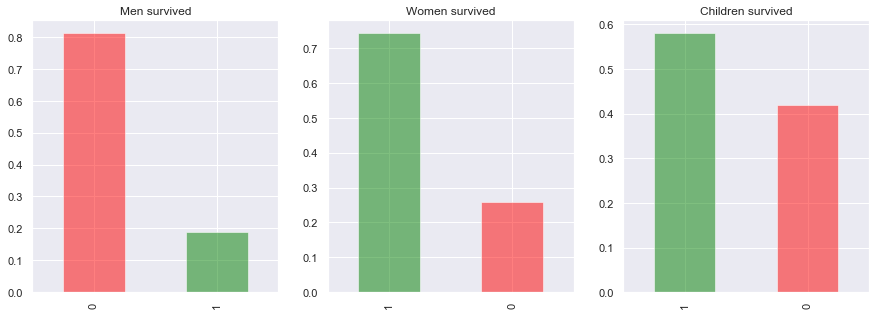

In [35]:
plt.subplot(1,3,1)
train.Survived[train.Sex =='male'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5, color=['red','green'])
plt.title("Men survived")

plt.subplot(1,3,2)
train.Survived[train.Sex =='female'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5, color=['green','red'])
plt.title("Women survived")

plt.subplot(1,3,3)
train.Survived[train.Age < 13].value_counts(normalize=True).plot(kind='bar', alpha = 0.5, color=['green','red'])
plt.title("Children survived")

20% Men, 70% women, 55% Preteens survived.

### 6.Gender + Class

Text(0.5, 1.0, 'Women of Class 1')

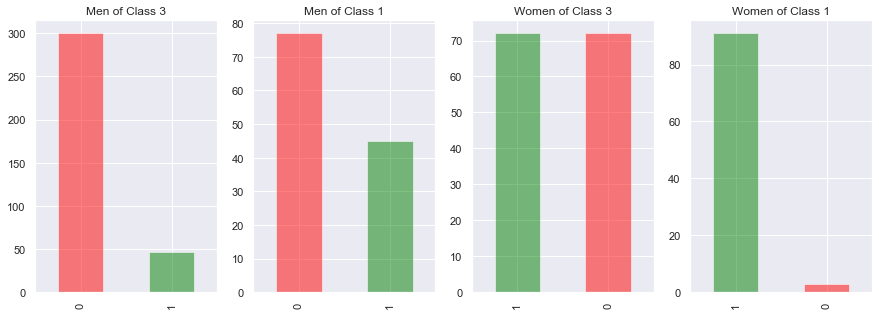

In [93]:
plt.subplot(1,4,1)
train.Survived[(train.Sex == 'male') & (train.Pclass == 3)].value_counts().plot.bar(alpha=0.5, color=['red','green'])
plt.title('Men of Class 3')

plt.subplot(1,4,2)
train.Survived[(train.Sex == 'male') & (train.Pclass == 1)].value_counts().plot.bar(alpha=0.5, color=['red','green'])
plt.title('Men of Class 1')

plt.subplot(1,4,3)
train.Survived[(train.Sex == 'female') & (train.Pclass == 3)].value_counts().plot.bar(alpha=0.5, color=['green','red'])
plt.title('Women of Class 3')

plt.subplot(1,4,4)
train.Survived[(train.Sex == 'female') & (train.Pclass == 1)].value_counts().plot.bar(alpha=0.5, color=['green','red'])
plt.title('Women of Class 1')

In [104]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CategoricalAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"(48.168, 64.084]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,"(0.34, 16.336]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"(16.336, 32.252]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"(0.34, 16.336]"


### 4. Feature Engineering 

Feature engineering is the process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.Feature vector is an n-dimensional vector of numerical features that represent some object.
Many algorithms in machine learning require a numerical representation of objects,
since such representations facilitate processing and statistical analysis.

In [37]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

### Cleaning data 

In [ ]:
def clean_data(data) :
    data['Fare'] = data['Fare'].fillna(data['Fare']).dropna().median()
    # data['Age'] = data['Age'].fillna(data['Age']).dropna().median()   already done for full data
     
    data.loc[data['Sex'] == 'male', 'Sex'] = 0
    data.loc[data['Sex'] == 'female', 'Sex'] = 1
    
    # data['Embarked'] = data['Embarked'].fillna('S')   already done for full data
    data.loc[data['Embarked'] == 'S', 'Embarked' ] = 0
    data.loc[data['Embarked'] == 'C', 'Embarked' ] = 1
    data.loc[data['Embarked'] == 'Q', 'Embarked' ] = 2